# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv('/content/Dataset_inisiasi.csv')

df.head()

,age,balance,housing,loan,cluster
0,58,2143,yes,no,0
1,44,29,yes,no,0
2,33,2,yes,yes,1
3,47,1506,yes,no,0
4,33,1,no,no,2


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
X = df.drop('cluster', axis=1)
y = df['cluster']

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [4]:
# Step 2: Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ]
)

# Step 3: Tambahkan VarianceThreshold untuk menghapus fitur konstan
variance_filter = VarianceThreshold(threshold=0.0)

# Step 4: Tambahkan Seleksi Fitur
feature_selector = SelectKBest(score_func=f_classif, k=10)

# Buat pipeline lengkap dengan preprocessing, penghapusan fitur konstan, seleksi fitur, dan classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('variance_filter', variance_filter),
    ('feature_selector', feature_selector),
    ('classifier', RandomForestClassifier(
        random_state=42,
        criterion='entropy',         # Menggunakan entropy sebagai kriteria split
        bootstrap=True,
        max_features='sqrt',         # Membatasi jumlah fitur per split
        class_weight='balanced'      # Menangani ketidakseimbangan kelas
    ))
])

# Step 5: Train Model
pipeline.fit(X_train, y_train)

# Step 6: Evaluasi Model
y_pred = pipeline.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=6. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0


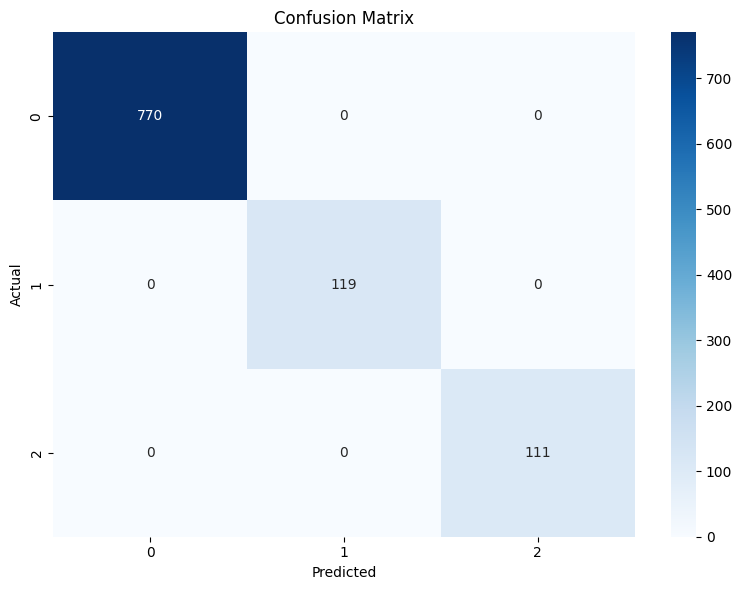

In [5]:
# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Tampilkan metrik evaluasi
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Buat dan tampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [6]:
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2']
}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=cv,
    scoring='balanced_accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("\nBest Parameters:")
print(grid_search.best_params_)
best_model = grid_search.best_estimator_

# Step 7: Evaluasi Model
y_train_grid = best_model.predict(X_train)
y_test_grid = best_model.predict(X_test)


Best Parameters:
{'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=6. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Hasil Evaluasi Model Grid Search:
Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0


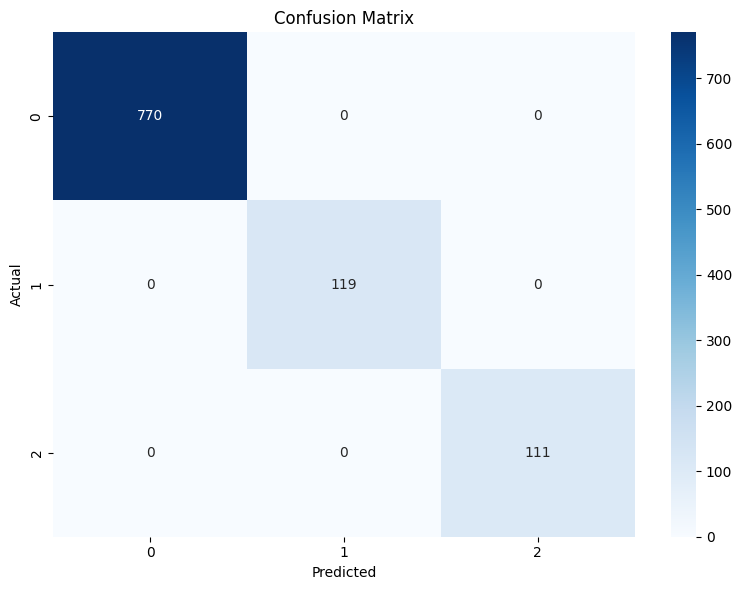

In [7]:
test_accuracy = accuracy_score(y_test, y_test_grid)
test_f1 = f1_score(y_test, y_test_grid, average='weighted')
test_precision = precision_score(y_test, y_test_grid, average='weighted')
test_recall = recall_score(y_test, y_test_grid, average='weighted')

# Tampilkan metrik evaluasi
print("Hasil Evaluasi Model Grid Search:")
print("Accuracy:", test_accuracy)
print("F1 Score:", test_f1)
print("Precision:", test_precision)
print("Recall:", test_recall)

# Buat dan tampilkan confusion matrix
cm = confusion_matrix(y_test, y_test_grid)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Dapat dilihat dari model di atas bahwa sebelum dan sesudah dilakukan tuning berupa grid search, model sama-sama menghasilkan metrik evaluasi secara sempurna yaitu bernilai 1.
2. Pada praktiknya, saya telah mencoba variasi feature atau kolom yang digunakan pada dataset. Mulai dari menggunakan empat kolom hingga menggunakan seluruh kolom seperti sekarang, tetapi hasilnya tetap saja bernilai 1. Hal ini bisa disebabkan karena:
- Hasil silhouette score cluster bernilai 0.947, yang menandakan cluster terpisah dengan bagus
- Karena cluster yang terpisah secara bagus tersebut, maka model dapat dengan mudah mengklasifikasikan kolom pada dataset
3. Rekomendasi:
- Kumpulkan dataset independen tambahan
- Uji model pada data baru dari sumber berbeda